In [1]:
!pip install folium
!pip install geocoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
blr_pop = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
blr_pop.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [5]:


CLIENT_ID = '4NL4WVAU0ISZLSC5XPTPQOZFVLIBJJCNQDAOTQD4SGBGEVCW'
CLIENT_SECRET = 'I2BX255ER3UWDA55SZFY0T3RPTRI34AY3JKJ3GIER5T3CMJX'
VERSION = '20180604'
LIMIT = 150



In [6]:
unique = df['Borough'].unique().tolist()
unique

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [7]:
colors ={}
for i in unique:
    colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
colors

{'Central': '#5B9046',
 'Eastern': '#46ECD5',
 'NorthEastern': '#43DC67',
 'Northern': '#FE95CB',
 'SouthEastern': '#433654',
 'Southern': '#E307B5',
 'SouthernSuburbs': '#DA3D7E',
 'Western': '#CC8A67'}

In [8]:


bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()


bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=colors[boro],
    fill=True,
    fill_color = colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)
bangalore_map

In [9]:
def getVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(venues)

In [10]:
blr_vens=getVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [11]:
blr_vens.shape
blr_vens.head()

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
2,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
3,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [12]:
blr_vens.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       120
Fast Food Restaurant     30
Café                     29
Bakery                   24
Ice Cream Shop           22
Department Store         18
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       14
Park                     12
Name: Neighborhood, dtype: int64

In [13]:
len(blr_vens['Venue Category'].unique())

138

[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Electron

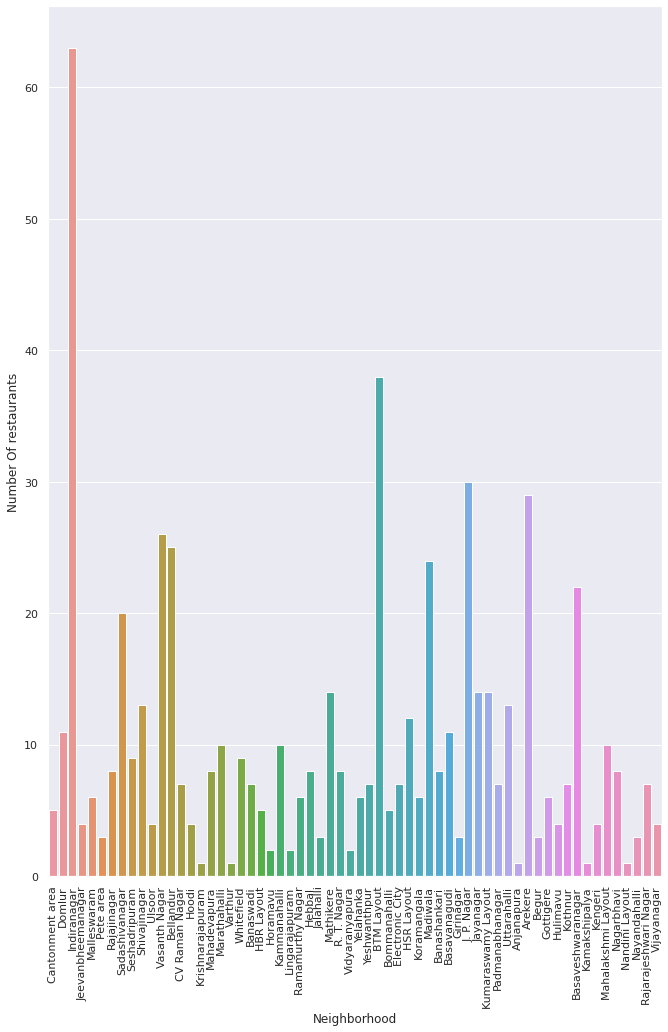

In [14]:
ven_count = blr_vens.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
ven_count.rename(columns={'Borough':'Number Of restaurants'},inplace=True)
ven_count.reset_index(inplace=True)
ven_count;
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='Number Of restaurants',data=ven_count)
plot.set_xticklabels(ven_count['Neighborhood'],rotation=90)

In [15]:
onehot = pd.get_dummies(blr_vens[['Venue Category']])
onehot['Neighborhood'] = blr_vens['Neighborhood']
grouped_vens = onehot.groupby('Neighborhood').mean().reset_index()
grouped_vens




,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Arekere,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.034483,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,BTM Layout,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.052632,0.0,0.000000,0.0,0.0
3,Banashankari,0.000000,0.125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Banaswadi,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Vidyaranyapura,0.500000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
58,Vijayanagar,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
59,Whitefield,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
60,Yelahanka,0.166667,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [16]:
venno = 5
for loc in grouped_vens['Neighborhood']:
    print(loc,)
    temp = grouped_vens[grouped_vens['Neighborhood'] == loc].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(venno))
    print('\n')
    
    #Freq of each type of venue in neighborhood, and its top venues

Anjanapura
                               Venue  Frequency
0                 Venue Category_ATM        1.0
1           Venue Category_Nightclub        0.0
2     Venue Category_Motorcycle Shop        0.0
3       Venue Category_Movie Theater        0.0
4  Venue Category_Mughlai Restaurant        0.0


Arekere
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.28
1  Venue Category_Sporting Goods Shop       0.14
2          Venue Category_Pizza Place       0.07
3          Venue Category_Supermarket       0.03
4                  Venue Category_Pub       0.03


BTM Layout
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.21
1           Venue Category_Snack Place       0.08
2        Venue Category_Ice Cream Shop       0.08
3    Venue Category_Chinese Restaurant       0.08
4  Venue Category_Fast Food Restaurant       0.05


Banashankari
                              Venue  Frequency
0  Venue Category_Indi

In [17]:
def common_venues(row, number_of_top_venues):
    categories = row.iloc[1:]
    categories_sorted = categories.sort_values(ascending=False)
    return categories_sorted.index.values[0:venno]

In [18]:
venno = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(venno):
    try:
        columns.append('{}{} '.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th '.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = grouped_vens['Neighborhood']

for ind in np.arange(grouped_vens.shape[0]):
    venues_sorted.iloc[ind, 1:] = common_venues(grouped_vens.iloc[ind, :], venno)

venues_sorted.head()

,Neighborhood,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,Anjanapura,Venue Category_ATM,Venue Category_Fast Food Restaurant,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Falafel Restaurant,Venue Category_Deli / Bodega
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Pub,Venue Category_Fast Food Restaurant
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant
3,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Miscellaneous Shop,Venue Category_Accessories Store,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,Venue Category_Yoga Studio,Venue Category_Fast Food Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market


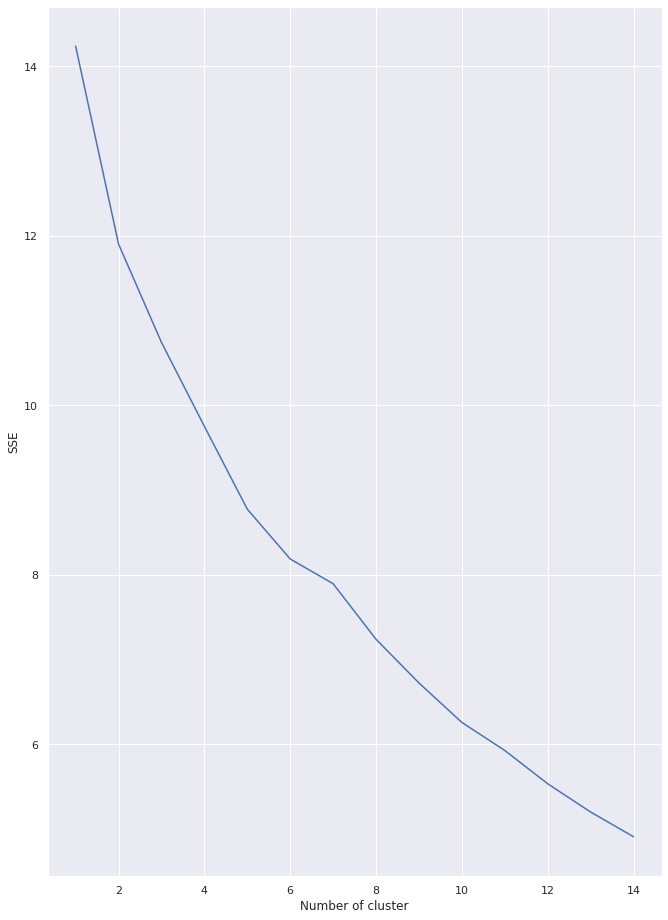

In [19]:
#Clustering to find recs

sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(grouped_vens.drop('Neighborhood',axis=1))
    grouped_vens['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(grouped_vens.drop('Neighborhood',axis=1))
grouped_vens['Cluster'] = kmeans.labels_
grouped_vens.groupby('Cluster')['Neighborhood'].count()
grouped_vens.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_African Restaurant',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       ...
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Venue Category_Yoga Studio',
       'Cluster'],
      dtype='object', length=140)

In [21]:
venues_sorted = venues_sorted.merge(grouped_vens,on='Neighborhood')
venues_sorted.head(4)

,Neighborhood,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,...,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Fast Food Restaurant,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Falafel Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Pub,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,...,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,4
3,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Miscellaneous Shop,Venue Category_Accessories Store,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4


In [22]:
venues_sorted.columns
venues_sorted = venues_sorted.merge(blr_vens,on='Neighborhood')

In [23]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_sorted['Neighborhood Latitude'], venues_sorted['Neighborhood Longitude'], venues_sorted['Neighborhood'], venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [24]:
#Finding other locations using pop and income
body = client_6864d57809a440289ecaffa2f70cbbc6.get_object(Bucket='applieddatasciencecaptone1-donotdelete-pr-1xsejr9azggg3g',Key='income_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

income = pd.read_csv(body)
income.head()


,Unnamed: 0,Borough,Neighborhoods,AverageIncome
0,0,Central,Cantonment area,18944.099792
1,1,Central,Domlur,56837.022198
2,2,Central,Indiranagar,41991.817435
3,3,Central,Jeevanbheemanagar,6667.447632
4,4,Central,Malleswaram,53270.063892


In [25]:

body = client_6864d57809a440289ecaffa2f70cbbc6.get_object(Bucket='applieddatasciencecaptone1-donotdelete-pr-1xsejr9azggg3g',Key='population_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

population = pd.read_csv(body)
population.head()


,Unnamed: 0,Borough,Neighborhoods,Population
0,0,Central,Cantonment area,866377
1,1,Central,Domlur,743186
2,2,Central,Indiranagar,474289
3,3,Central,Jeevanbheemanagar,527874
4,4,Central,Malleswaram,893629


In [26]:
population['Normalized_population'] = population['Population']/population['Population'].max(axis=0)
population.head()



,Unnamed: 0,Borough,Neighborhoods,Population,Normalized_population
0,0,Central,Cantonment area,866377,0.880810
1,1,Central,Domlur,743186,0.755567
2,2,Central,Indiranagar,474289,0.482190
3,3,Central,Jeevanbheemanagar,527874,0.536668
4,4,Central,Malleswaram,893629,0.908516


In [27]:
income['Normalized_income'] = income['AverageIncome']/income['AverageIncome'].max(axis=0)
income.head()

,Unnamed: 0,Borough,Neighborhoods,AverageIncome,Normalized_income
0,0,Central,Cantonment area,18944.099792,0.293051
1,1,Central,Domlur,56837.022198,0.879225
2,2,Central,Indiranagar,41991.817435,0.649581
3,3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,4,Central,Malleswaram,53270.063892,0.824047


In [28]:
#recommending veg?


asian = onehot.groupby(['Neighborhood']).sum().reset_index()
asian.head()



,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,Banashankari,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
asian['Venue Category_Asian Restaurant']


0     0
1     0
2     0
3     0
4     0
     ..
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Asian Restaurant, Length: 62, dtype: uint8

In [30]:
asian = asian[['Neighborhood','Venue Category_Asian Restaurant']]
asian.rename(columns={'Venue Category_Asian Restaurant':'Number Of Asian Restaurants'},inplace=True)
asian.head()

,Neighborhood,Number Of Asian Restaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,0
3,Banashankari,0
4,Banaswadi,0


In [31]:
asian['Other Restaurants'] = 1-(asian['Number Of Asian Restaurants']/asian['Number Of Asian Restaurants'].max(axis=0))
asian.head(10)

,Neighborhood,Number Of Asian Restaurants,Other Restaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,0,1.0
3,Banashankari,0,1.0
4,Banaswadi,0,1.0
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [32]:
#target neihborhood

target_cluster = venues_sorted.loc[venues_sorted['Neighborhood']=='Banashankari']
target_cluster.reset_index();

In [33]:
target_cluster1 = target_cluster.iloc[0].at['Cluster']
target_cluster1

4

In [34]:
potential = venues_sorted[venues_sorted['Cluster']==target_cluster1]
potential.head();
potential.reset_index().head()
potential.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
potential.head();
asian.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
asian.head();

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
potential =potential.merge(population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
potential = potential.merge(income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
potential = potential.merge(asian[['Neighborhoods','Number Of Asian Restaurants','Other Restaurants']],on='Neighborhoods')

In [36]:
potential.head()

,Neighborhoods,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,Number Of Asian Restaurants,Other Restaurants
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Pub,...,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop,138760,0.141072,29378.716626,0.454466,0,1.0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Pub,...,Benison Super Market,12.884668,77.594678,Department Store,138760,0.141072,29378.716626,0.454466,0,1.0
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Pub,...,Guru Garden,12.891196,77.597979,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Pub,...,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Pub,...,Kababis,12.889605,77.597557,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0


In [48]:
potential['Ranking'] = potential['Normalized_population'] * 0.5 + potential['Normalized_income'] * 0.35 +potential['Other Restaurants'] * 0.1
recommended = potential.sort_values(by='Ranking',ascending=False)
recommended.reset_index(inplace=True, drop=True)
recommended.head();

In [47]:
top3 = recommended.groupby(['Neighborhoods','1st ','2nd ','3rd '])['Ranking'].unique()
top3_df = pd.DataFrame(top3).reset_index()
top3_df.head(3)

,Neighborhoods,1st,2nd,3rd,Ranking
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,[0.32959888840700646]
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,[0.7918117751640322]
2,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Pizza Place,[0.8234029969357849]


In [ ]:
#The Most similar areas to Banashankari (based on food) is Arekere and BTM Layout!